In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import scipy.io.wavfile
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
list=os.listdir(path='free-spoken-digit/dev') # list files in a directory

In [3]:
labels=[]
for i in list:
    labels.append(i[-5:-4])

In [4]:
data=[]
for i in list:
    data.append((scipy.io.wavfile.read('free-spoken-digit/dev'+"/"+i)[1]))

In [5]:
len(data[0])

3124

In [6]:
df=pd.DataFrame(data=data)

In [7]:
df['labels']=labels

In [8]:
df.head()#The numbers represents the amplitude in the time
#The arrays doesn't have the same lenght we will have to fill the nan values as 0 because ther is nothing

,0,1,2,3,4,5,6,7,8,9,...,17558,17559,17560,17561,17562,17563,17564,17565,17566,labels
0,14,21,0,18,-11,22,-15,-53,9,-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,10,1,13,3,12,7,10,8,13,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,0,-256,0,-256,0,0,-256,0,-256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,-169,1,-144,19,-140,70,-118,92,-85,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,309,-385,435,-183,-34,188,-1,-23,13,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [9]:
df.fillna(0,inplace=True)

In [10]:
ana=df.iloc[:,:-1].T.describe() #


In [11]:
range=ana.loc['max']-ana.loc['min']

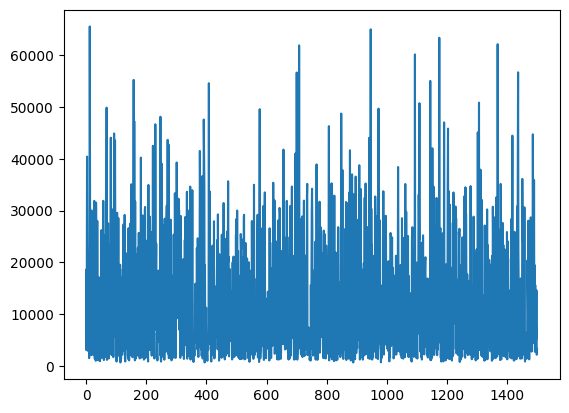

In [12]:
plt.plot(range) #The range of the data are really diferent

In [13]:
X=df.iloc[:,:-1]

In [14]:
ana.loc['mean']

0       -0.009222
1       -0.128821
2      -31.856094
3        0.057722
4        0.114818
          ...    
1495   -34.450048
1496   -31.564638
1497   -27.644561
1498     0.009848
1499    -0.030796
Name: mean, Length: 1500, dtype: float64

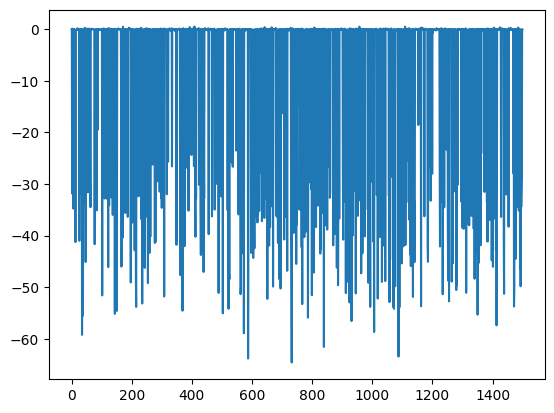

In [15]:
plt.plot(ana.loc['mean'])

In [16]:
n_chunks=1000
data_2 = [np.array_split(row,n_chunks) for row in data ]
lenght=[len(row)for row in data]

In [17]:
mean_2=[]
desv_2=[]
for raw in data_2:
    mean_1=[]
    desv_1=[]
    for vect in raw:
        mean_1.append(vect.mean())
        desv_1.append(vect.std())
    mean_2.append(mean_1)
    desv_2.append(desv_1)
    #The rank is ready
    #The original lenght too


In [18]:
#Now we need to put together the means, desv, lenght and rank in order to make the predictions

In [19]:
mean=pd.DataFrame(mean_2)
desv=pd.DataFrame(desv_2)

In [20]:
df=pd.concat([mean,desv],axis=1)

In [21]:
df['range']=range
df['lenght']=lenght
df['labels']=labels

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,range,lenght,labels
0,13.250000,-14.250000,4.250000,20.50,3.250000,-12.500000,5.500000,20.000000,-27.000000,-14.250000,...,6.944222,10.656245,9.977753,20.005555,13.072448,27.438821,34.179266,18548.0,3124,4
1,6.750000,9.250000,7.000000,6.50,-0.500000,-3.000000,-10.500000,-14.250000,-21.500000,-14.500000,...,4.109609,4.784233,3.299832,8.259674,4.189935,4.496913,1.885618,3053.0,3103,0
2,-85.333333,-85.333333,-85.333333,-256.00,-170.666667,-85.333333,-85.333333,-85.333333,-341.333333,-341.333333,...,0.000000,128.000000,0.000000,128.000000,128.000000,128.000000,128.000000,12800.0,2415,1
3,-86.600000,6.400000,15.800000,50.80,4.000000,4.800000,32.000000,22.800000,36.000000,8.000000,...,36.155912,21.741378,10.012492,42.793107,19.817921,40.438224,54.641445,40420.0,4751,6
4,44.000000,32.500000,-16.500000,29.25,-120.000000,144.000000,-28.500000,-61.000000,-34.250000,248.750000,...,42.197946,53.897021,38.308688,36.609046,45.828182,32.561054,15.253415,23434.0,3888,2


In [23]:
x=df.iloc[:,:-1].values #I need to obtain the values of the feautures of the dataset
y=df.iloc[:,-1].values#I need to obtain the values of the labels of the dataset

In [24]:
#We are gonna normalize in order to improve the accurracy (0.22916666666666666)
from sklearn import preprocessing
standard = preprocessing.scale(x)

In [25]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(x,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]

In [26]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
standard_train_valid, standard_test, y_train_valid_1, y_test_1 = train_test_split(standard,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(standard_train_valid):
    s_train = standard_train_valid[train_indices]
    s_valid = standard_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train_1 = y_train_valid_1[train_indices]
    y_valid_1 = y_train_valid_1[validation_indices]

In [27]:
def best_param(model,params,X_train,y_train,X_valid,y_valid):
    from sklearn.model_selection import ParameterGrid
    max_accuracy = 0
    best_config = None

    for config in ParameterGrid(params):
        clf = model(**config)
        clf.fit(X_train,y_train)
        y_pred_DT = clf.predict(X_valid)
        val=(accuracy_score(y_valid,y_pred_DT))

        if val > max_accuracy:
                max_accuracy = val
                best_config = config

    print("Best Configuration:")
    for key, value in best_config.items():
        print(f"{key}: {value}")
    print(f"Best Accuracy: {max_accuracy:.4f}")
    return y_pred_DT



In [28]:
params_DesT ={ #Define the possible values of the parameters in the models
     "max_depth": [None, 2, 4, 8],
     "splitter": ["best", "random"],
     "max_features":[13,7,3,10],
     "ccp_alpha":[0,0.3,0.6,0.8]
}

params_Random_Forest={
     "criterion" : ["gini","entropy","log_loss"],
    "max_depth": [None, 100,2,50,15],
    "max_features": ['sqrt', 'log2', 0.5,100],
    "max_leaf_nodes": [None, 100,2,50,10],
    "ccp_alpha": [0.0,0.7,0.4,0.2,]
}

params_GaussianNB={
    "var_smoothing": [1e-9,0.05,0.1,0.5,0.005]
}

In [29]:
best_param(DecisionTreeClassifier,params_DesT,X_train,y_train,X_valid,y_valid)

Best Configuration:
ccp_alpha: 0
max_depth: 8
max_features: 13
splitter: best
Best Accuracy: 0.2458


array(['7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7

In [30]:
best_param(RandomForestClassifier,params_Random_Forest,X_train,y_train,X_valid,y_valid)

In [ ]:
best_param(GaussianNB,params_GaussianNB,X_train,y_train,X_valid,y_valid)

Best Configuration:
var_smoothing: 1e-09
Best Accuracy: 0.2750


array(['2', '6', '3', '8', '2', '2', '4', '0', '2', '2', '2', '7', '2',
       '2', '1', '2', '4', '2', '8', '8', '2', '2', '4', '8', '2', '0',
       '0', '3', '2', '7', '2', '6', '0', '2', '2', '7', '3', '0', '0',
       '2', '4', '6', '2', '4', '4', '0', '2', '6', '2', '2', '1', '7',
       '4', '2', '7', '7', '3', '2', '2', '2', '2', '3', '2', '2', '2',
       '8', '4', '7', '3', '8', '2', '2', '2', '2', '2', '2', '0', '7',
       '2', '2', '2', '2', '8', '8', '2', '2', '2', '8', '2', '2', '2',
       '2', '2', '8', '2', '2', '2', '2', '2', '8', '8', '2', '2', '2',
       '7', '4', '2', '2', '2', '2', '2', '2', '2', '2', '2', '8', '3',
       '2', '2', '8', '0', '3', '2', '2', '1', '0', '2', '2', '4', '0',
       '2', '4', '4', '2', '2', '2', '2', '7', '2', '2', '7', '3', '0',
       '8', '2', '2', '2', '4', '2', '2', '2', '1', '2', '2', '4', '2',
       '3', '2', '2', '7', '2', '6', '2', '2', '2', '5', '4', '2', '0',
       '2', '2', '2', '7', '3', '2', '2', '7', '0', '2', '4', '0

In [ ]:
#Now we are gonna try with the normalized data
best_param(DecisionTreeClassifier,params_DesT,s_train,y_train_1,s_valid,y_valid_1)

Best Configuration:
ccp_alpha: 0
max_depth: None
max_features: 13
splitter: random
Best Accuracy: 0.2917


array(['4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4

In [ ]:
best_param(RandomForestClassifier,params_DesT,s_train,y_train_1,s_valid,y_valid_1)

In [ ]:
best_param(GaussianNB,params_DesT,s_train,y_train_1,s_valid,y_valid_1)

In [ ]:
#Now We are going to apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(x)

In [ ]:
X_p=pca.fit_transform(standard)

In [ ]:
#After the pca we can prove again the split and models
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
p_train_valid, p_test, y_train_valid_2, y_test_2 = train_test_split(X_p,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    p_train = p_train_valid[train_indices]
    p_valid = p_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train_2 = y_train_valid_2[train_indices]
    y_valid_2 = y_train_valid_2[validation_indices]

In [ ]:
best_param(DecisionTreeClassifier,params_DesT,p_train,y_train_2,p_valid,y_valid_2)

In [ ]:
best_param(RandomForestClassifier,params_DesT,p_train,y_train_2,p_valid,y_valid_2)

In [ ]:
best_param(GaussianNB,params_DesT,p_train,y_train_2,p_valid,y_valid_2)